In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as clr

# https://stackoverflow.com/questions/38147997/how-to-change-a-linearsegmentedcolormap-to-a-different-distribution-of-color
clrs = list(map(lambda x: (x[0]/8.0, x[1]), enumerate(['#5a77d1', '#6788ee', '#9abbff', '#c9d7f0', '#8c93a1', '#edd1c2', '#f7a889', '#e26952', '#c95a44'])))
clrs = list(map(lambda x: (x[0]/6.0, x[1]), enumerate(['#5a77d1', '#6788ee', '#9abbff', '#a9aaab', '#f7a889', '#e26952', '#c95a44'])))
# clrs = list(map(lambda x: (x[0]/7.0, x[1]), enumerate(['#5a77d1', '#9abbff', '#c9d7f0', '#aeb9cf', '#edd1c2', '#f7a889', '#e26952', '#c95a44'])))

custom_cmap = clr.LinearSegmentedColormap.from_list('custom coolwarm', clrs, N=256)

# cmap = {obsv_id:np.random.random() for obsv_id in range(9)}
# sm = ScalarMappable(norm=Normalize(vmin=min(list(cmap.values())), vmax=max(list(cmap.values()))), cmap=sns.cubehelix_palette(as_cmap=True))


In [3]:
PHQ_ITEM_COLUMN_MAP = {'PHQ.SQ01.': 'Lack_of_interest', 'PHQ.SQ02.': 'Feeling_depressed', 'PHQ.SQ03.': 'Trouble_falling_asleep_or_sleeping_too_much',
                           'PHQ.SQ04.': 'Fatigue', 'PHQ.SQ05.': 'Poor_appetite_or_overeating', 'PHQ.SQ06.': 'Feeling_bad_about_oneself',
                           'PHQ.SQ07.': 'Difficulty_concentrating', 'PHQ.SQ08.': 'Moving_or_speaking_slowly_or_too_quickly', 
                           'PHQ.SQ09.': 'Thoughts_of_death_or_suicide'}
PHQ_ITEM_COLUMN_MAPPING = {k: 'target_{}'.format(v) for k, v in PHQ_ITEM_COLUMN_MAP.items()}

## Loading Target CSV

In [4]:
target_csv = pd.read_csv('/chronos_data/avirinchipur/reasoning_for_psych/kjell_prolific/depTextOnly.csv')
target_csv

,user_id,startdate,submitdate,dep_text,phq_score,PHQ.SQ01.,PHQ.SQ02.,PHQ.SQ03.,PHQ.SQ04.,PHQ.SQ05.,PHQ.SQ06.,PHQ.SQ07.,PHQ.SQ08.,PHQ.SQ09.,PHQ.SQ10.
0,1,2020-08-07 11:38:22,2020-08-07 11:46:22,"Over the past two weeks, I have not been depre...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2,2020-08-07 11:34:31,2020-08-07 11:58:36,I don't think I have felt depressed. I'm not f...,17.0,3.0,2.0,0.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0
2,3,2020-08-07 11:36:32,2020-08-07 11:51:54,I have been depressed because I am worried abo...,21.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0
3,4,2020-08-07 12:55:26,2020-08-07 13:22:42,Over the past 2 weeks i have been feeling depr...,13.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
4,5,2020-08-07 11:37:19,2020-08-07 12:04:52,yes very much just seem everything is getting ...,9.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,972,2020-08-07 11:45:11,2020-08-07 12:02:58,There has been time when I have not wanted to ...,11.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0
959,973,2020-08-07 13:32:04,2020-08-07 13:45:57,"I’m not sure if I’ve been depressed exactly, I...",20.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,0.0,2.0
960,974,2020-08-07 12:52:04,2020-08-07 13:11:46,"I haven’t felt depressed. However, I have expe...",20.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
961,975,2020-08-07 12:28:54,2020-08-07 12:51:07,I have suffered from depression since my early...,22.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,2.0


In [5]:
target_df = target_csv.rename(columns=PHQ_ITEM_COLUMN_MAPPING)

In [6]:
target_df

,user_id,startdate,submitdate,dep_text,phq_score,target_Lack_of_interest,target_Feeling_depressed,target_Trouble_falling_asleep_or_sleeping_too_much,target_Fatigue,target_Poor_appetite_or_overeating,target_Feeling_bad_about_oneself,target_Difficulty_concentrating,target_Moving_or_speaking_slowly_or_too_quickly,target_Thoughts_of_death_or_suicide,PHQ.SQ10.
0,1,2020-08-07 11:38:22,2020-08-07 11:46:22,"Over the past two weeks, I have not been depre...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2,2020-08-07 11:34:31,2020-08-07 11:58:36,I don't think I have felt depressed. I'm not f...,17.0,3.0,2.0,0.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0
2,3,2020-08-07 11:36:32,2020-08-07 11:51:54,I have been depressed because I am worried abo...,21.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0
3,4,2020-08-07 12:55:26,2020-08-07 13:22:42,Over the past 2 weeks i have been feeling depr...,13.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0
4,5,2020-08-07 11:37:19,2020-08-07 12:04:52,yes very much just seem everything is getting ...,9.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,972,2020-08-07 11:45:11,2020-08-07 12:02:58,There has been time when I have not wanted to ...,11.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0
959,973,2020-08-07 13:32:04,2020-08-07 13:45:57,"I’m not sure if I’ve been depressed exactly, I...",20.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,0.0,2.0
960,974,2020-08-07 12:52:04,2020-08-07 13:11:46,"I haven’t felt depressed. However, I have expe...",20.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0
961,975,2020-08-07 12:28:54,2020-08-07 12:51:07,I have suffered from depression since my early...,22.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,2.0


## Analysis of Roberta internal structure

In [7]:
roba_pred = pd.read_csv('/home/avirinchipur/research/llm_reasoning_psych/data/roba_L19_phq9allpred_int.csv')
roba_pred

,user_id,pred_Difficulty_concentrating,pred_Fatigue,pred_Feeling_bad_about_oneself,pred_Feeling_depressed,pred_Lack_of_interest,pred_Moving_or_speaking_slowly_or_too_quickly,pred_Poor_appetite_or_overeating,pred_Thoughts_of_death_or_suicide,pred_Trouble_falling_asleep_or_sleeping_too_much,pred_total_phq,combined_pred
0,1,1,1,1,1,1,0,1,0,1,7,6
1,2,1,1,1,1,1,0,1,0,1,7,6
2,3,2,2,2,2,2,1,2,1,2,16,15
3,4,2,3,2,2,2,1,2,1,2,17,18
4,5,2,2,2,2,2,1,2,1,2,16,15
...,...,...,...,...,...,...,...,...,...,...,...,...
951,972,2,3,2,2,3,1,2,1,2,18,17
952,973,2,2,2,2,2,1,2,1,2,16,16
953,974,1,1,1,1,1,0,1,0,1,7,6
954,975,3,3,3,3,3,1,2,1,3,22,23


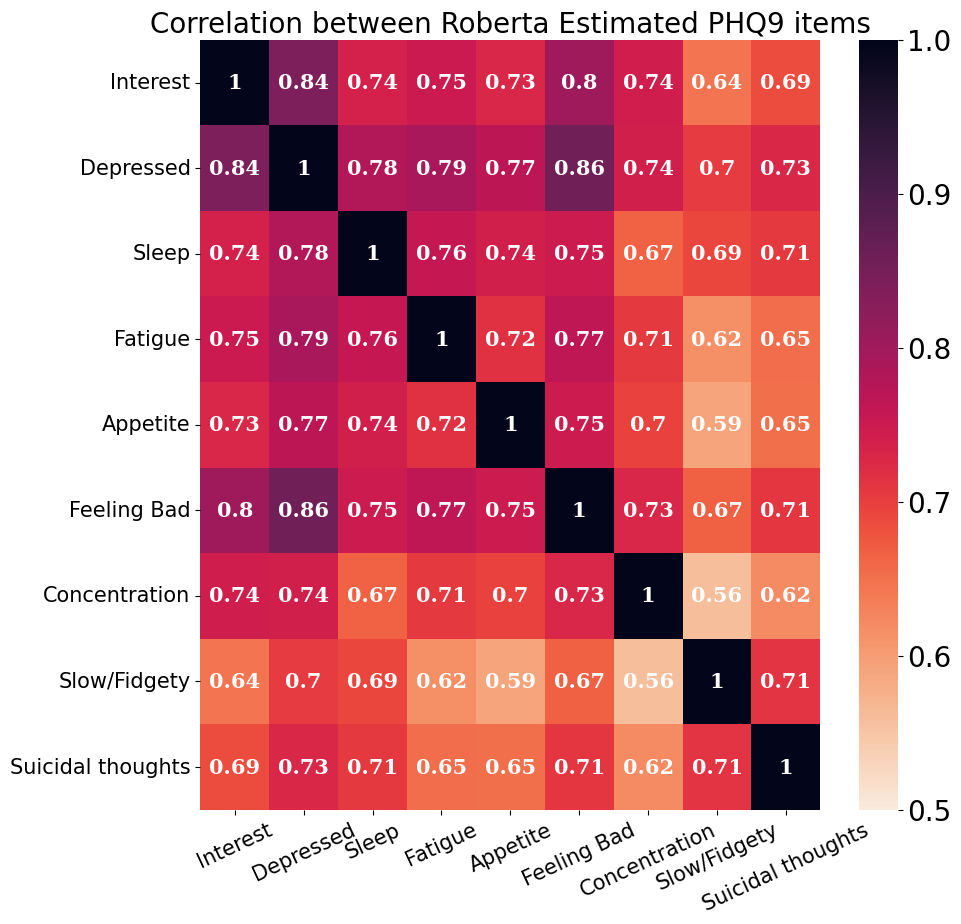

In [8]:
# Correlation in between all the items 
corr_df = roba_pred[['pred_{}'.format(i) for i in PHQ_ITEM_COLUMN_MAP.values()]].corr().values
# Turn this into sns heatmap, with x axis label rotated 35 degrees, font size of the correlation values inside the heatmap as 20
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr_df, annot=True, cmap='rocket_r', vmin=0.5, vmax=1, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': 'white'
            })
plt.title('Correlation between Roberta Estimated PHQ9 items', fontsize=20)
tick_pos = range(9)
tick_labels = ['Interest', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Feeling Bad', 'Concentration', 'Slow/Fidgety', 'Suicidal thoughts']
# ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels, rotation=25, fontsize=15)
ax.set_yticklabels(tick_labels, rotation=0, fontsize=15)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
plt.show()

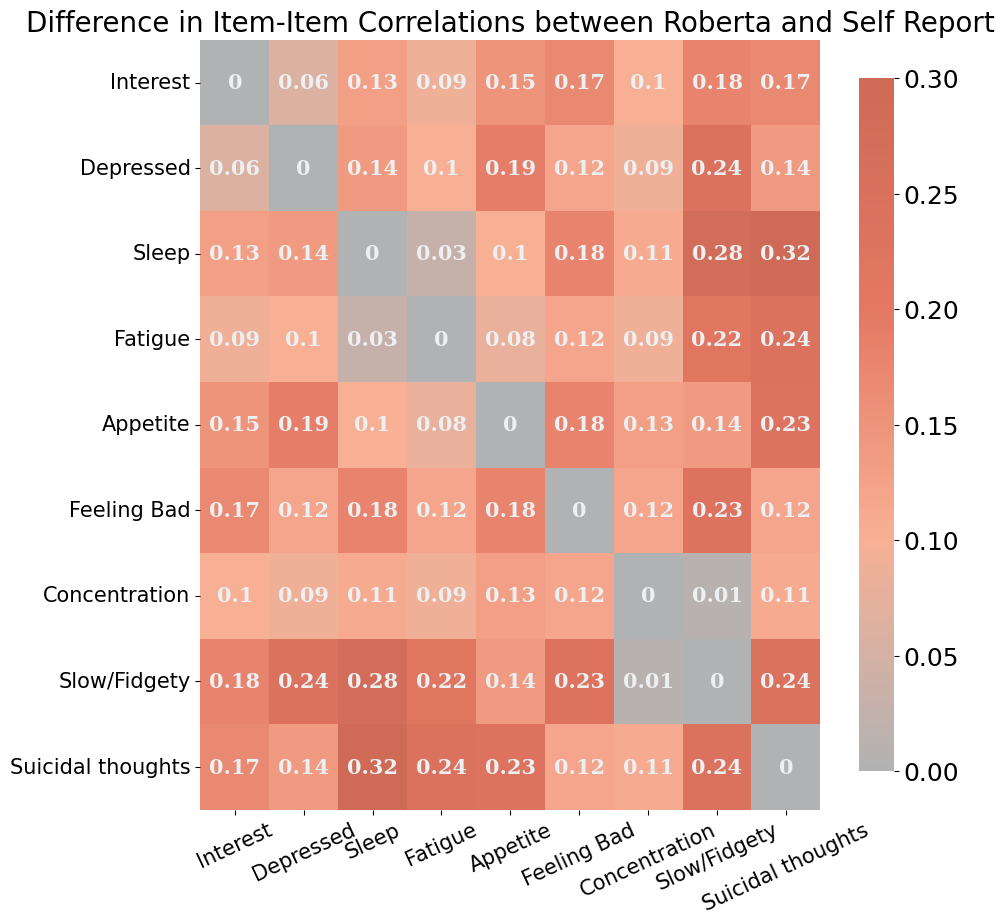

In [9]:
# Difference between GPT4 estimated items correlations and Self report items correlations


clrs = list(map(lambda x: (x[0]/3.0, x[1]), enumerate(['#a9aaab', '#f7a889', '#e26952', '#c95a44'])))
# clrs = list(map(lambda x: (x[0]/7.0, x[1]), enumerate(['#5a77d1', '#9abbff', '#c9d7f0', '#aeb9cf', '#edd1c2', '#f7a889', '#e26952', '#c95a44'])))

custom_cmap = clr.LinearSegmentedColormap.from_list('custom coolwarm', clrs, N=256)


x_y = pd.merge(roba_pred[['user_id']+['pred_{}'.format(i) for i in PHQ_ITEM_COLUMN_MAP.values()]], target_df[['user_id']+['{}'.format(j) for j in PHQ_ITEM_COLUMN_MAPPING.values()]], on='user_id')

# gpt4_items_corr = parsed_response_df[['score_{}'.format(i) for i in PHQ_ITEM_COLUMN_MAP.values()]].corr()
roba_items_corr = x_y[['pred_{}'.format(i) for i in PHQ_ITEM_COLUMN_MAP.values()]].corr()
selfreport_items_corr = x_y[['{}'.format(i) for i in PHQ_ITEM_COLUMN_MAPPING.values()]].corr()

# selfreport_items_corr = target_df[target_df.user_id.isin(parsed_response_df.user_id)][['{}'.format(i) for i in PHQ_ITEM_COLUMN_MAPPING.values()]].rename(dict([(v, k) for k, v in PHQ_ITEM_COLUMN_MAPPING.items()])).corr()

diff_corr = np.round(roba_items_corr.values - selfreport_items_corr.values, 2)

# Turn this into sns heatmap, with x axis label rotated 35 degrees
plt.figure(figsize=(10, 10))
ax = sns.heatmap(diff_corr, annot=True, cmap=custom_cmap, vmin=0.0, vmax=0.3, alpha=0.90, annot_kws={
                'fontsize': 15,
                'fontweight': 'bold',
                'fontfamily': 'serif',
                'color': '#edf0f2',
                'alpha': 1
            }, cbar_kws={'shrink': 0.9})
plt.title('Difference in Item-Item Correlations between Roberta and Self Report', fontsize=20)
tick_pos = range(9)
tick_labels = ['Interest', 'Depressed', 'Sleep', 'Fatigue', 'Appetite', 'Feeling Bad', 'Concentration', 'Slow/Fidgety', 'Suicidal thoughts']
# ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels, rotation=25, fontsize=15)
ax.set_yticklabels(tick_labels, rotation=0, fontsize=15)
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=18)
plt.show()


## Comparison with self report

In [10]:
combined_df = pd.merge(roba_pred[['user_id']+['pred_{}'.format(i) for i in PHQ_ITEM_COLUMN_MAP.values()]+['pred_total_phq', 'combined_pred']], target_df[['user_id']+['{}'.format(j) for j in PHQ_ITEM_COLUMN_MAPPING.values()]+['phq_score']], on='user_id')
combined_df.columns

Index(['user_id', 'pred_Lack_of_interest', 'pred_Feeling_depressed',
       'pred_Trouble_falling_asleep_or_sleeping_too_much', 'pred_Fatigue',
       'pred_Poor_appetite_or_overeating', 'pred_Feeling_bad_about_oneself',
       'pred_Difficulty_concentrating',
       'pred_Moving_or_speaking_slowly_or_too_quickly',
       'pred_Thoughts_of_death_or_suicide', 'pred_total_phq', 'combined_pred',
       'target_Lack_of_interest', 'target_Feeling_depressed',
       'target_Trouble_falling_asleep_or_sleeping_too_much', 'target_Fatigue',
       'target_Poor_appetite_or_overeating',
       'target_Feeling_bad_about_oneself', 'target_Difficulty_concentrating',
       'target_Moving_or_speaking_slowly_or_too_quickly',
       'target_Thoughts_of_death_or_suicide', 'phq_score'],
      dtype='object')

In [11]:
# Caluclate pearson correlation between self report and roberta pred
roba_pred, roba_itemtotal_pred, self_report = combined_df['combined_pred'].values, combined_df['pred_total_phq'].values, combined_df['phq_score'].values
roba_pred_pearson, p_val = pearsonr(roba_pred, self_report)
print ('Pearson correlation between Roberta predicted PHQ9 and Self report PHQ9: {} ({})'.format(round(roba_pred_pearson, 3), round(p_val, 3)))
roba_itemtotal_pred_pearson, p_val = pearsonr(roba_itemtotal_pred, self_report)
print ('Pearson correlation between Sum of Roberta PHQ9 items and Self report PHQ9: {} ({})'.format(round(roba_itemtotal_pred_pearson, 3), round(p_val, 3)))

Pearson correlation between Roberta predicted PHQ9 and Self report PHQ9: 0.726 (0.0)
Pearson correlation between Sum of Roberta PHQ9 items and Self report PHQ9: 0.717 (0.0)


In [12]:
correlations_with_combined = {}
for i in PHQ_ITEM_COLUMN_MAP.values():
    roba_item_pred = combined_df[['user_id', 'pred_{}'.format(i), 'combined_pred']]
    # target_item_pred = target_df[['user_id', 'target_{}'.format(i)]]
    # items_df = pd.merge(gpt4_item_pred, target_item_pred, on='user_id')
    corr, p_val = pearsonr(roba_item_pred[['combined_pred']].values.reshape(-1, ), roba_item_pred[['pred_{}'.format(i)]].values.reshape(-1, ))
    correlations_with_combined[i] = round(corr, 3)
    # print ('Item correlation {}: {}/{}'.format(i, round(corr, 3), round(p_val, 3)))

print ("Roberta item correlation with combined PHQ9 prediction. (N={})".format(len(combined_df)))    
correlations_with_target = sorted(correlations_with_combined.items(), key=lambda x: -x[1])
for item, corr in correlations_with_target:
    print ('Correlation with combined PHQ9 prediction for Item {}: {}'.format(item, corr))

Roberta item correlation with combined PHQ9 prediction. (N=956)
Correlation with combined PHQ9 prediction for Item Feeling_depressed: 0.916
Correlation with combined PHQ9 prediction for Item Feeling_bad_about_oneself: 0.896
Correlation with combined PHQ9 prediction for Item Lack_of_interest: 0.877
Correlation with combined PHQ9 prediction for Item Fatigue: 0.873
Correlation with combined PHQ9 prediction for Item Trouble_falling_asleep_or_sleeping_too_much: 0.83
Correlation with combined PHQ9 prediction for Item Poor_appetite_or_overeating: 0.827
Correlation with combined PHQ9 prediction for Item Difficulty_concentrating: 0.825
Correlation with combined PHQ9 prediction for Item Thoughts_of_death_or_suicide: 0.796
Correlation with combined PHQ9 prediction for Item Moving_or_speaking_slowly_or_too_quickly: 0.743


In [33]:
correlations_with_target = {}
for i in PHQ_ITEM_COLUMN_MAP.values():
    roba_item_pred = combined_df[['user_id', 'pred_{}'.format(i), 'phq_score']]
    # target_item_pred = target_df[['user_id', 'target_{}'.format(i)]]
    # items_df = pd.merge(gpt4_item_pred, target_item_pred, on='user_id')
    corr, p_val = pearsonr(roba_item_pred[['phq_score']].values.reshape(-1, ), roba_item_pred[['pred_{}'.format(i)]].values.reshape(-1, ))
    correlations_with_target[i] = round(corr, 3)
    # print ('Item correlation {}: {}/{}'.format(i, round(corr, 3), round(p_val, 3)))

print ("Roberta item correlation with target PHQ9 total.")    
correlations_with_target = sorted(correlations_with_target.items(), key=lambda x: -x[1])
for item, corr in correlations_with_target:
    print ('Correlation with Target PHQ9 total for Item {}: {}'.format(item, corr))

Roberta item correlation with target PHQ9 total.
Correlation with Target PHQ9 total for Item Feeling_depressed: 0.683
Correlation with Target PHQ9 total for Item Feeling_bad_about_oneself: 0.661
Correlation with Target PHQ9 total for Item Fatigue: 0.648
Correlation with Target PHQ9 total for Item Lack_of_interest: 0.641
Correlation with Target PHQ9 total for Item Trouble_falling_asleep_or_sleeping_too_much: 0.614
Correlation with Target PHQ9 total for Item Poor_appetite_or_overeating: 0.597
Correlation with Target PHQ9 total for Item Thoughts_of_death_or_suicide: 0.587
Correlation with Target PHQ9 total for Item Difficulty_concentrating: 0.578
Correlation with Target PHQ9 total for Item Moving_or_speaking_slowly_or_too_quickly: 0.553


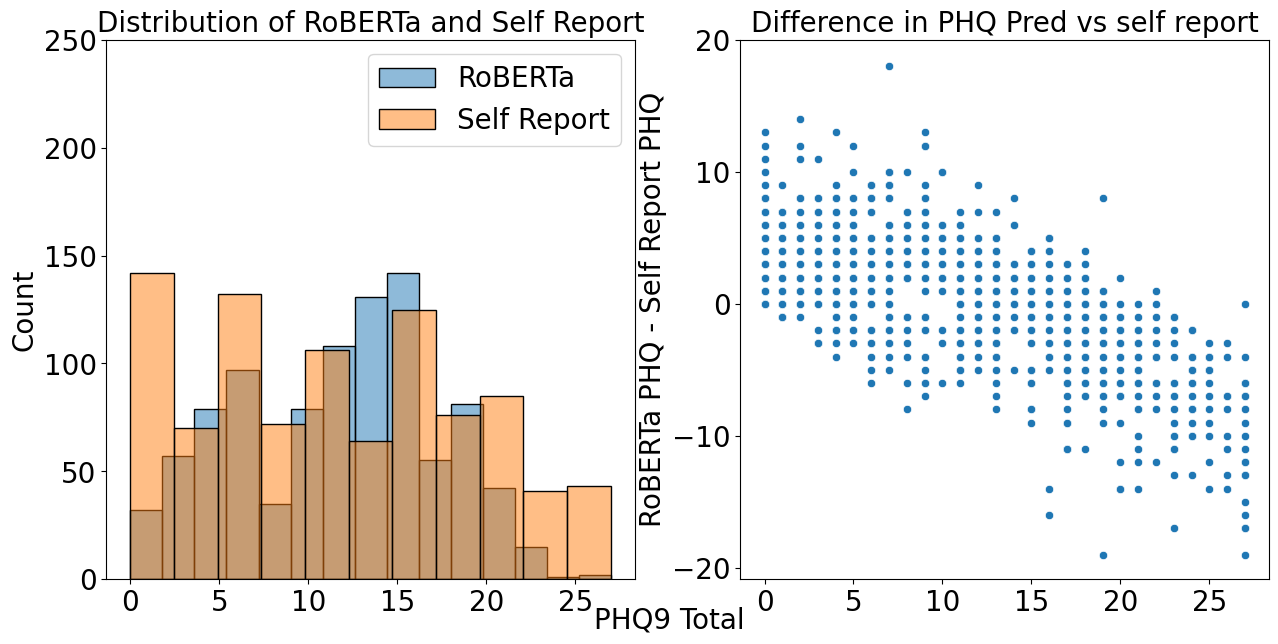

In [41]:
# Plot the Distribution of Roberta combined pred PHQ9 and self report PHQ9 total
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
x = combined_df['combined_pred'].values
y = combined_df['phq_score'].values
sns.histplot(x, label='RoBERTa', alpha=0.5, ax=axs[0])
sns.histplot(y, label='Self Report', alpha=0.5, ax=axs[0])
axs[0].set_title('Distribution of RoBERTa and Self Report', fontsize=20)
axs[0].legend(fontsize=20)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].set_ylabel('Count', fontsize=20)
axs[0].set_yticks(range(0, 251, 50))

# Plot of error in GPT4 and Self report PHQ9 total vs Self report PHQ9 total
y = (combined_df['combined_pred'] - combined_df['phq_score']).values
x = combined_df['phq_score'].values
sns.scatterplot(x=x, y=y, ax=axs[1])
axs[1].set_title('Difference in PHQ Pred vs self report', fontsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)
# set the x-axis label
axs[1].set_ylabel('RoBERTa PHQ - Self Report PHQ', fontsize=20)
axs[1].set_yticks(range(-20, 25, 10))

# Set common y label as PHQ9 total
fig.text(0.5, 0.04, 'PHQ9 Total', ha='center', fontsize=20)
plt.show()

## Comparison with Self report (Real values)

In [26]:
roba_df = pd.read_csv('/home/avirinchipur/research/llm_reasoning_psych/data/roba_L19_phq9allpred.csv')
roba_df

,user_id,feat,pred
0,515,Lack_of_interest,2.275055
1,261,Lack_of_interest,1.073677
2,775,Lack_of_interest,1.180035
3,266,Lack_of_interest,0.529144
4,523,Lack_of_interest,1.839841
...,...,...,...
9555,242,total_phq,10.404550
9556,755,total_phq,16.369124
9557,501,total_phq,20.392285
9558,761,total_phq,14.436662


In [27]:
roba_df = roba_df.pivot_table(index='user_id', columns='feat', values='pred').reset_index()
roba_df

feat,user_id,Difficulty_concentrating,Fatigue,Feeling_bad_about_oneself,Feeling_depressed,Lack_of_interest,Moving_or_speaking_slowly_or_too_quickly,Poor_appetite_or_overeating,Thoughts_of_death_or_suicide,Trouble_falling_asleep_or_sleeping_too_much,total_phq
0,1,0.958241,0.736271,0.613498,0.879809,0.803850,0.334301,0.855334,0.248792,1.095188,6.455260
1,2,0.505794,1.314716,1.095054,1.033533,0.971749,0.323541,1.026453,-0.018609,1.068556,6.032261
2,3,1.766501,2.039968,1.572378,2.002878,1.935323,0.924806,1.534718,0.756049,1.934479,15.180979
3,4,1.861274,2.530052,2.036220,2.300062,2.050181,1.137707,1.990990,0.972996,2.107996,17.808520
4,5,1.501158,2.324928,1.862788,1.879626,1.805780,0.845965,1.659222,0.763651,1.869619,15.022123
...,...,...,...,...,...,...,...,...,...,...,...
951,972,1.775987,2.666513,1.679258,2.066702,2.586398,0.836338,2.061024,0.945631,2.051853,17.335890
952,973,1.731870,2.195722,1.707296,1.835059,1.912843,0.857135,1.575759,0.891520,1.886182,15.792343
953,974,0.808222,1.140554,0.725295,0.840286,1.142163,0.347664,0.952180,0.339266,1.165471,6.359554
954,975,2.677125,3.516222,2.985204,3.044489,2.636488,1.287714,2.218564,1.431483,2.596879,23.269640


In [29]:
for item in PHQ_ITEM_COLUMN_MAP.values():
    item_combined_df = pd.merge(roba_df[['user_id', item]], target_df[['user_id', 'target_{}'.format(item)]], on='user_id')
    roba_item_pred, target_item_pred = item_combined_df[item].values, item_combined_df['target_{}'.format(item)].values
    item_corr, p_val = pearsonr(roba_item_pred, target_item_pred)
    print ('Item correlation {}: {} ({})'.format(item, round(item_corr, 3), round(p_val, 3)))
    

Item correlation Lack_of_interest: 0.608 (0.0)
Item correlation Feeling_depressed: 0.712 (0.0)
Item correlation Trouble_falling_asleep_or_sleeping_too_much: 0.558 (0.0)
Item correlation Fatigue: 0.639 (0.0)
Item correlation Poor_appetite_or_overeating: 0.508 (0.0)
Item correlation Feeling_bad_about_oneself: 0.617 (0.0)
Item correlation Difficulty_concentrating: 0.496 (0.0)
Item correlation Moving_or_speaking_slowly_or_too_quickly: 0.399 (0.0)
Item correlation Thoughts_of_death_or_suicide: 0.438 (0.0)


In [30]:
total_score_combined_df = pd.merge(roba_df[["user_id", "total_phq"]], target_df[['user_id', 'phq_score']], on='user_id')
corr, p_val = pearsonr(total_score_combined_df['total_phq'].values, total_score_combined_df['phq_score'].values)
print ('Total PHQ9 correlation: {} ({})'.format(round(corr, 3), round(p_val, 3)))

Total PHQ9 correlation: 0.727 (0.0)


In [33]:
user_ids_in_experts = pd.read_csv('/cronus_data/avirinchipur/reasoning_for_psych/expts/parsed_responses/Item_level_scores_Katarina.csv')['user_id'].tolist()
len(user_ids_in_experts)

209

In [34]:
# Re run correlations with only the users in the expert dataset
for item in PHQ_ITEM_COLUMN_MAP.values():
    item_combined_df = pd.merge(roba_df[['user_id', item]], target_df[['user_id', 'target_{}'.format(item)]], on='user_id')
    item_combined_df = item_combined_df[item_combined_df.user_id.isin(user_ids_in_experts)]
    roba_item_pred, target_item_pred = item_combined_df[item].values, item_combined_df['target_{}'.format(item)].values
    item_corr, p_val = pearsonr(roba_item_pred, target_item_pred)
    print ('Item correlation {}: {} ({})'.format(item, round(item_corr, 3), round(p_val, 3)))

Item correlation Lack_of_interest: 0.617 (0.0)
Item correlation Feeling_depressed: 0.675 (0.0)
Item correlation Trouble_falling_asleep_or_sleeping_too_much: 0.617 (0.0)
Item correlation Fatigue: 0.646 (0.0)
Item correlation Poor_appetite_or_overeating: 0.534 (0.0)
Item correlation Feeling_bad_about_oneself: 0.616 (0.0)
Item correlation Difficulty_concentrating: 0.504 (0.0)
Item correlation Moving_or_speaking_slowly_or_too_quickly: 0.382 (0.0)
Item correlation Thoughts_of_death_or_suicide: 0.465 (0.0)


In [35]:
total_score_combined_df = pd.merge(roba_df[["user_id", "total_phq"]], target_df[['user_id', 'phq_score']], on='user_id')
total_score_combined_df = total_score_combined_df[total_score_combined_df.user_id.isin(user_ids_in_experts)]
corr, p_val = pearsonr(total_score_combined_df['total_phq'].values, total_score_combined_df['phq_score'].values)
print ('Total PHQ9 correlation: {} ({})'.format(round(corr, 3), round(p_val, 3)))

Total PHQ9 correlation: 0.719 (0.0)
